<a href="https://colab.research.google.com/github/sebids10/Gaussian_Filter_Python/blob/main/ProiectTD_AV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Filtru Gaussian pentru eliminarea zgomotului**

Numele studentilor


In [ ]:
StudentNameDeveloper = "Deaconu Stefan Senastian"
StudentNameManager = "Botezan Darius"
StudentSpecialization = "TST Ro"
print("This work is realised by: ")
print(StudentNameDeveloper, " - " , StudentSpecialization)
print(StudentNameManager, " - " , StudentSpecialization)

This work is realised by: 
Deaconu Stefan Senastian  -  TST Ro
Botezan Darius  -  TST Ro


Import pentru pachete utilizate

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
import random
from scipy.stats.kde import gaussian_kde
from google.colab import drive

<ipython-input-2-47779e83b532>:6: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  from scipy.stats.kde import gaussian_kde


Importarea imaginilor direct din drive, deoarece se sterg

Adaugam prima poza

In [ ]:
drive.mount('/content/drive')
path='/content/drive/MyDrive/ProiectTD_AV/poza1_nivel_gri.jpg'
path2='/content/drive/MyDrive/ProiectTD_AV/poza5.jpg'
#Image_FileName="poza1_nivel_gri.jpg"
#ImgGray=cv2.imread(path, 0) #citirea imaginii in grayscale pentru procesarea ei ulterioara
ImgGray=cv2.imread(path2, 0)
DPI=72
(H,W)=ImgGray.shape
sz=(W/DPI+1,H/DPI+1)

Mounted at /content/drive


In [ ]:
ImgGray

array([[ 99,  93,  89, ..., 138, 137, 135],
       [ 94,  88,  85, ..., 152, 150, 147],
       [ 92,  86,  82, ..., 163, 161, 157],
       ...,
       [  2,   2,   2, ...,   5,   5,   5],
       [  3,   3,   3, ...,   4,   4,   4],
       [  4,   4,   4, ...,   3,   3,   3]], dtype=uint8)

In [ ]:
ImgGray.max()

255

Afisam imaginea si histograma ei

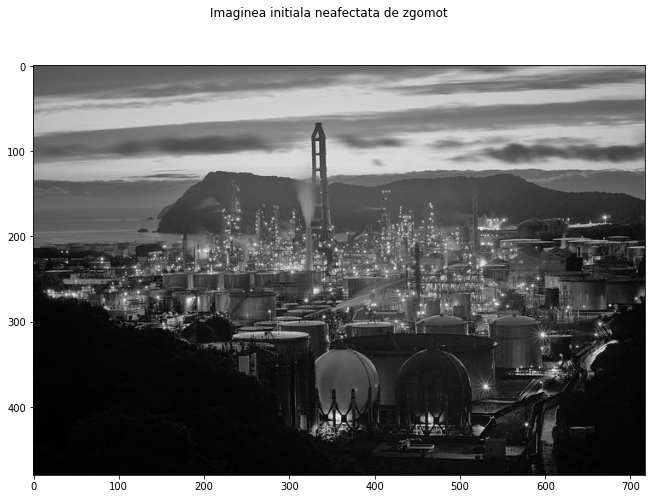

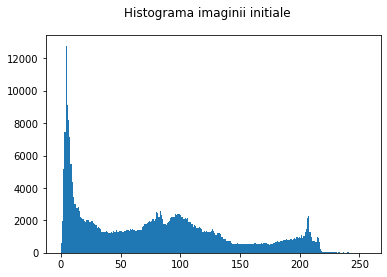

In [ ]:
plt.figure(figsize=sz)
plt.imshow(ImgGray,cmap='gray')
plt.suptitle('Imaginea initiala neafectata de zgomot')
plt.show()
Imggrayneg=255-ImgGray
plt.hist(ImgGray.ravel(),256,[0,255])
plt.suptitle('Histograma imaginii initiale')
plt.show()


Functia pentru crearea zgomotului Gaussian

Gaussian noise
g(x,y)=f(x,y)+n(x,y)
unde f(x,y) este functia imaginii initiale, n(x,y)= zgomotul

Gaussian noise formula:
p(z)=(1/sqrt(2*pi*sigma))*e^((z-zconjugat)^2/2*sigma^2)

<function matplotlib.pyplot.show(*args, **kw)>

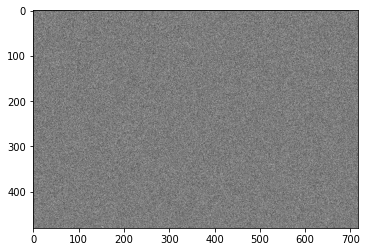

In [ ]:
x,y = ImgGray.shape #numarul total de linii si coloane
mean=0#media
var=25#deviatia standard
sigma=np.sqrt(var)
n=np.random.normal(loc=mean, scale=sigma, size=(x,y)) #scara nu trebuie sa fie negativa deoarece este egala cu deviatia standard


plt.figure()
plt.imshow(n,cmap = 'gray')
plt.show


Functia densitate de probabilitate

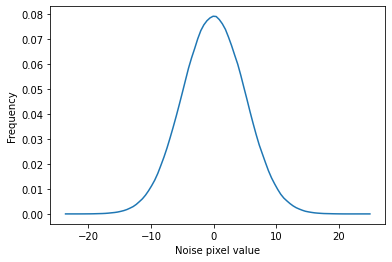

In [ ]:
kde = gaussian_kde(n.reshape(int(x*y))) #Kernel density estimation
dist_space = np.linspace(np.min(n), np.max(n), 100)#distanta spectrala
plt.plot(dist_space, kde(dist_space))
plt.xlabel('Noise pixel value'); plt.ylabel('Frequency')
plt.show()

Adaugam zgomotul Gaussian pe imaginea initiala

In [ ]:
ImagineaCuZgomot=ImgGray+n
plt.figure(figsize=(2*sz[0],2*sz[1]))
ax3=plt.subplot(2,2,2); plt.imshow(ImagineaCuZgomot,cmap = 'gray'); ax3.set_title("Imaginea originala afectata de zgomot")
ax2=plt.subplot(2,2,1); plt.imshow(ImgGray,cmap = 'gray'); ax2.set_title("Imaginea originala")
ax4=plt.subplot(2,2,4); plt.hist(ImagineaCuZgomot.ravel(),256,[0,255]); ax4.set_title("Histograma imaginii afectate de zgomot")
ax5=plt.subplot(2,2,3); plt.hist(ImgGray.ravel(),256,[0,255]); ax5.set_title("Histograma imaginii originale")
plt.show()
ImagineaCuZgomotNegaativa=255-ImagineaCuZgomot
plt.figure(figsize=(2.065*sz[0],2.065*sz[1]))
ax=plt.subplot(1,2,1);plt.imshow(Imggrayneg,cmap = 'gray'); ax.set_title("Imaginea negativa")
ax1=plt.subplot(1,2,2);plt.imshow(ImagineaCuZgomotNegaativa,cmap='gray'); ax1.set_title("Imaginea negativa afectata de zgomot")
plt.show()



Filtrare cu ajutorul unui filtru Gaussian si afisarea Kernel

In [ ]:
sigma=1
ImpulseImage=np.zeros((int(8*sigma+1),int(8*sigma+1)))
ImpulseImage[int(4*sigma),int(4*sigma)]=1
GaussKernel=ndimage.gaussian_filter(ImpulseImage,sigma)
GaussKernelImage=np.clip((GaussKernel*255).astype(np.uint8),0,255)#valorile aduse ca intregi pentru a fi plotuite

plt.figure()
plt.imshow(GaussKernelImage,cmap = 'rainbow',interpolation='bilinear')
plt.suptitle('The Gaussian kernel')
plt.show()
#Gaussian filtering of the image:
OutImg=ndimage.gaussian_filter(ImagineaCuZgomot,sigma)
plt.figure(figsize=sz)
plt.imshow(ImagineaCuZgomot,cmap = 'gray')
plt.suptitle('Imaginea afectata de zgomot')
plt.show()
plt.figure(figsize=sz)
plt.imshow(ImgGray,cmap = 'gray')
plt.suptitle('Imaginea initiala pe nivele de gri')
plt.show()
plt.figure(figsize=sz)
plt.imshow(OutImg,cmap = 'gray')
plt.suptitle('Imaginea dupa aplicarea filtrului gaussian')
plt.show()
plt.figure(figsize=sz)
plt.imshow(255-(np.abs(OutImg.astype(float)-ImagineaCuZgomot.astype(float)).astype(np.uint8)),cmap='gray')
plt.suptitle('Diferentele intre imaginea afectata de zgomot si cea filtrata')
plt.show()
rootmeansqrerror=np.sqrt(np.mean((OutImg.astype(float)-ImagineaCuZgomot.astype(float))**2))
print('Calculul RootMeanSquare: ',rootmeansqrerror)


Estompare Gaussiana cu ajutorul mastilor 3x3, 5x5, 7x7


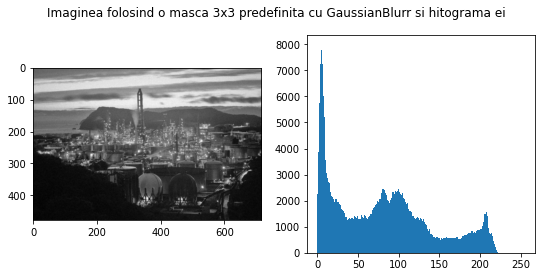

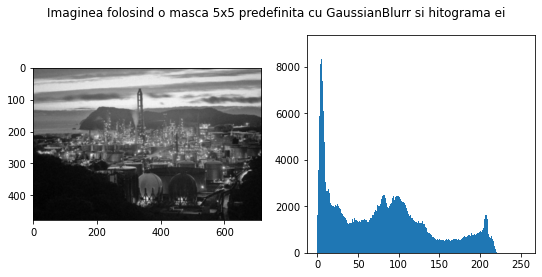

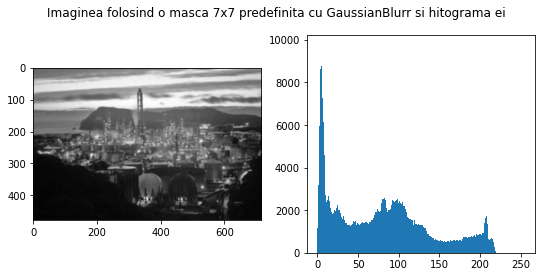

In [ ]:
img = cv2.GaussianBlur(ImagineaCuZgomot, (3, 3), 0)
img2 = cv2.GaussianBlur(ImagineaCuZgomot, (5, 5), 0)
img3 = cv2.GaussianBlur(ImagineaCuZgomot, (7, 7), 0)
plt.figure(figsize=(9,4))
plt.subplot(1,2,1); plt.imshow(img,cmap = 'gray')
plt.subplot(1,2,2); plt.hist(img.ravel(),256,[0,255])
plt.suptitle('Imaginea folosind o masca 3x3 predefinita cu GaussianBlurr si hitograma ei')
plt.show()


plt.figure(figsize=(9,4))
plt.subplot(1,2,1); plt.imshow(img2,cmap = 'gray')
plt.subplot(1,2,2); plt.hist(img2.ravel(),256,[0,255])
plt.suptitle('Imaginea folosind o masca 5x5 predefinita cu GaussianBlurr si hitograma ei')
plt.show()



plt.figure(figsize=(9,4))
plt.subplot(1,2,1); plt.imshow(img3,cmap = 'gray')
plt.subplot(1,2,2); plt.hist(img3.ravel(),256,[0,255])
plt.suptitle('Imaginea folosind o masca 7x7 predefinita cu GaussianBlurr si hitograma ei')
plt.show()


Aplicarea mastii de filtrare gaussiana 3x3 ce are urmatoarea forma:
$H_{3x3} = \left( \begin{array}{ccc}
1 & 2 & 1 \\
2 & 4 & 2 \\
1 & 2 & 1 \end{array} \right) $

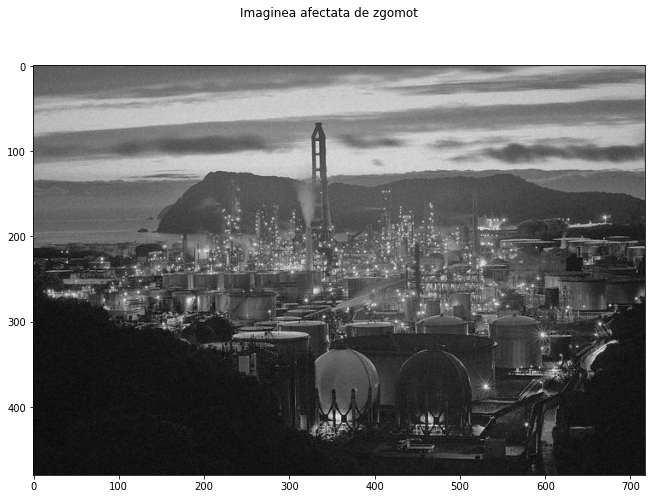

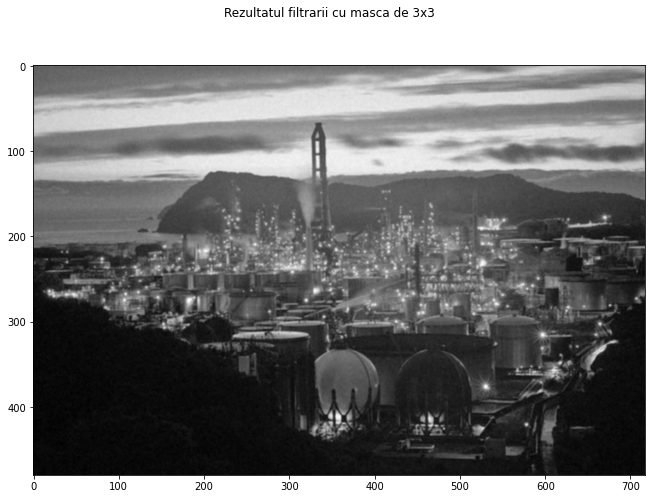

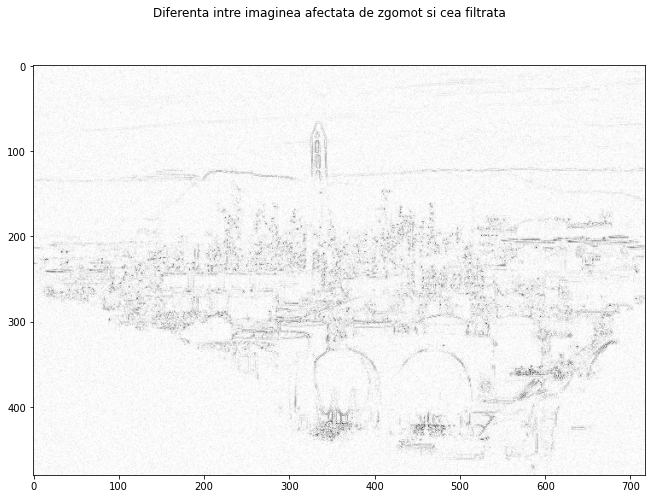

In [ ]:
Kernel3x3=np.array([[1,2,1],[2,4,2],[1,2,1]])
OutImg=ndimage.convolve(ImagineaCuZgomot,Kernel3x3)/16
plt.figure(figsize=sz)
plt.imshow(ImagineaCuZgomot,cmap = 'gray')
plt.suptitle('Imaginea afectata de zgomot')
plt.show()
plt.figure(figsize=sz)
plt.imshow(OutImg,cmap = 'gray')
plt.suptitle('Rezultatul filtrarii cu masca de 3x3')
plt.show()
plt.figure(figsize=sz)
plt.imshow(255-(np.abs(OutImg.astype(float)-ImagineaCuZgomot.astype(float)).astype(np.uint8)),cmap='gray')
plt.suptitle('Diferenta intre imaginea afectata de zgomot si cea filtrata')
plt.show()

Aplicarea mastii de filtrare gaussiana 5x5 ce are urmatoarea forma:
$H_{5x5} = \left( \begin{array}{ccc}
2 & 4 & 5 & 4 & 2 \\
4 & 9 & 12 & 9 & 4 \\
5 & 12 & 15 & 12 & 2 \\
4 & 9 & 12 & 9 & 4 \\
2 & 4 & 5 & 4 & 2 \end{array} \right) $


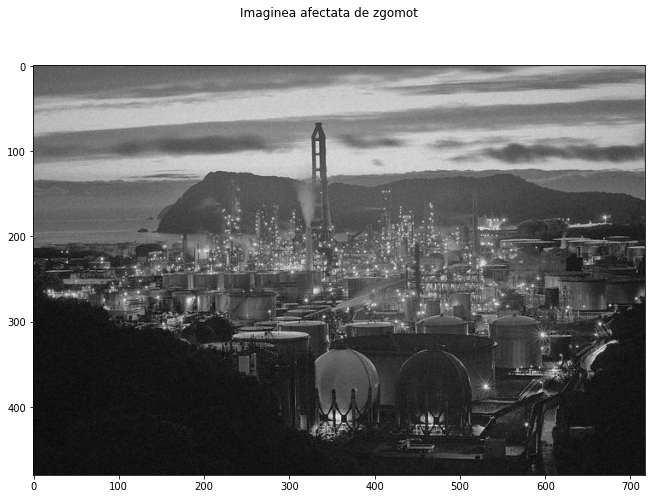

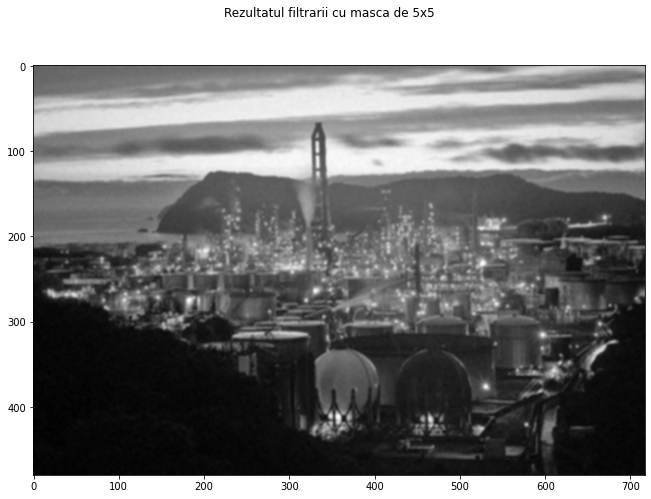

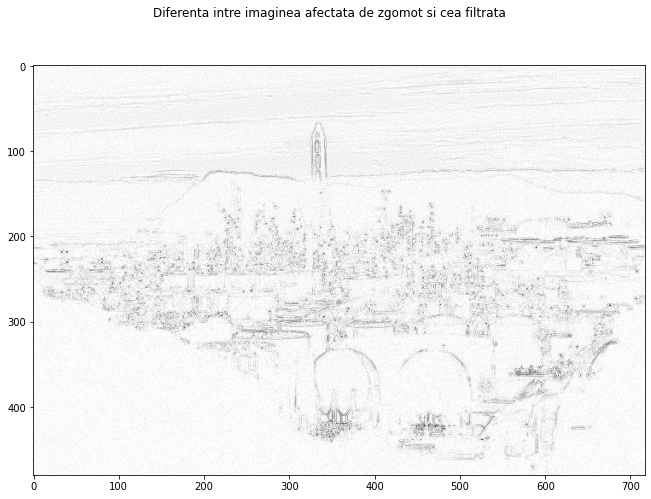

In [ ]:
Kernel5x5=np.array([[2,4,5,4,2],[4,9,12,9,4],[5,12,15,12,2],[4,9,12,9,4],[2,4,5,4,2]])
OutImg=ndimage.convolve(ImagineaCuZgomot,Kernel5x5)/150
plt.figure(figsize=sz)
plt.imshow(ImagineaCuZgomot,cmap = 'gray')
plt.suptitle('Imaginea afectata de zgomot')
plt.show()
plt.figure(figsize=sz)
plt.imshow(OutImg,cmap = 'gray')
plt.suptitle('Rezultatul filtrarii cu masca de 5x5')
plt.show()
plt.figure(figsize=sz)
plt.imshow(255-(np.abs(OutImg.astype(float)-ImagineaCuZgomot.astype(float)).astype(np.uint8)),cmap='gray')
plt.suptitle('Diferenta intre imaginea afectata de zgomot si cea filtrata')
plt.show()